In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import os, sys

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Download mnist

In [18]:
dataset_dir = "dataset/mnist"
if os.path.exists(dataset_dir) is False:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    os.makedirs(dataset_dir)
    np.save(dataset_dir+"/x_train.npy", x_train)
    np.save(dataset_dir+"/y_train.npy", y_train)
    np.save(dataset_dir+"/x_test.npy", x_test)
    np.save(dataset_dir+"/y_test.npy", x_test)
    print("saved npys")
else:
    x_train = np.load(dataset_dir+"/x_train.npy")
    y_train = np.load(dataset_dir+"/y_train.npy")
    x_test  = np.load(dataset_dir+"/x_test.npy")
    y_test  = np.load(dataset_dir+"/y_test.npy")
    print("load local npys")

load local npys


In [19]:
print("num(train)={0}, num(test)={1}".format(len(y_train), len(y_test)) )

num(train)=60000, num(test)=10000


In [20]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

pickup data

In [21]:
n_train = 50
n_test  = 10
x_train = x_train[:n_train, :,:]
y_train = y_train[:n_train]
x_test  = x_test[:n_test, :,:]
y_test  = y_test[:n_test]

x_train.shape, y_train.shape

((50, 28, 28), (50,))

Create binary image

In [22]:
x_train=x_train/255.0
x_test =x_test/255.0

y_train = x_train*1.0
y_train[ y_train <= 0.5 ] = 0
y_train[ y_train > 0.5 ] = 1

y_test = x_test*1.0
y_test[ y_test <= 0.5 ] = 0
y_test[ y_test > 0.5 ] = 1

x_train.shape, y_train.shape

((50, 28, 28), (50, 28, 28))

In [23]:
if len(x_train.shape) == 3:
    x_train = np.reshape(x_train, x_train.shape+(1,))
    y_train = np.reshape(y_train, y_train.shape+(1,))
    x_test  = np.reshape(x_test,  x_test.shape+(1,))
    y_test  = np.reshape(y_test,  y_test.shape+(1,))
x_train.shape, y_train.shape

((50, 28, 28, 1), (50, 28, 28, 1))

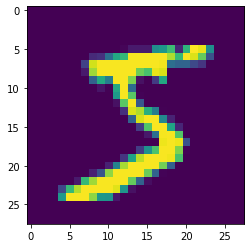

In [24]:
plt.imshow(x_train[0,:,:,0])

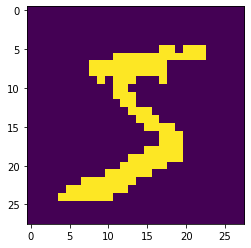

In [25]:
plt.imshow(y_train[0,:,:,0])

one hot

In [26]:
y_train2 = tf.one_hot(y_train, 2)
y_test2 = tf.one_hot(y_test, 2)
y_train2.shape, y_test2.shape

(TensorShape([Dimension(50), Dimension(28), Dimension(28), Dimension(1), Dimension(2)]),
 TensorShape([Dimension(10), Dimension(28), Dimension(28), Dimension(1), Dimension(2)]))

Session

In [27]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))

Model

In [28]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [29]:
def conv_block(input, filters):
    out = Conv2D(filters, kernel_size=(2,2), strides=1, padding='same')(input)
    out = BatchNormalization()(out)
    out = Activation('relu')(out)
#    out = Conv2D(filters, kernel_size=(3,3), strides=1, padding='same')(out)
#    out = BatchNormalization()(out)
#    out = Activation('relu')(out)
    return out

def CNN(nClasses, input_shape=(28, 28, 1)):
    inputs = Input(shape=input_shape)
    conv1 = conv_block(inputs, 4)
    conv2 = conv_block(conv1,  8)
    conv3 = conv_block(conv2, 16)
    conv4 = conv_block(conv3,  8)
    conv5 = conv_block(conv4,  4)
    out = Conv2D(nClasses, (3, 3), padding='same')(conv5)
    out = Activation('softmax')(out)
    out = tf.reshape( out, [-1, input_shape[0], input_shape[1], 1, nClasses] )
    model = Model(inputs=[inputs], outputs=[out])
    return model

model = CNN(2, x_train.shape[1:])

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 4)         20        
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 4)         16        
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 8)         136       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 8)         0   

Train

In [33]:
model.fit( x=x_train, y=y_train2, batch_size=10, steps_per_epoch=n_train//10,
          epochs=100, verbose=1, shuffle=True)

Train on 5 samples
Epoch 1/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0514
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0501
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0489
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0477
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0466
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0456
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0446
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0436
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0427
Epoch 10/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0418
Epoch 11/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0410
Epoch 12/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0401
Epoch 13/100
5/5 [============

Test

In [42]:
tmp = model.predict( x_test[0:5,:,:,:] )

In [43]:
tmp.shape

(5, 28, 28, 1, 2)

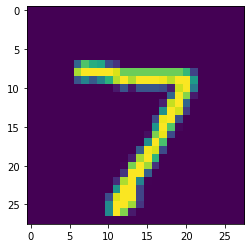

In [44]:
plt.imshow(x_test[0,:,:,0])

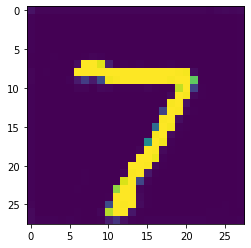

In [45]:
plt.imshow(tmp[0,:,:,0,1])

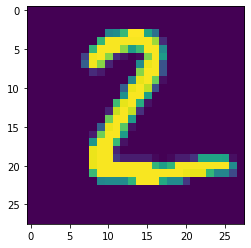

In [46]:
plt.imshow(x_test[1,:,:,0])

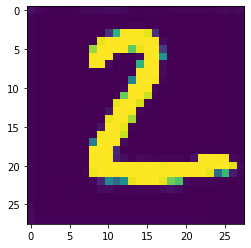

In [47]:
plt.imshow(tmp[1,:,:,0,1])

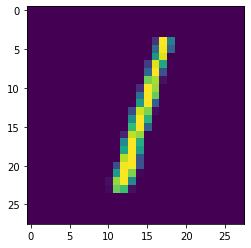

In [48]:
plt.imshow(x_test[2,:,:,0])

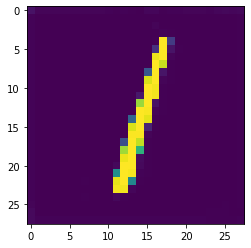

In [49]:
plt.imshow(tmp[2,:,:,0,1])